In [1]:
import pandas as pd
import numpy as np;
import seaborn as sns;
import pandas as pd
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [2]:
y=train.Y
train=train.drop(['Y'],1)
train.shape

(3000, 101)

In [3]:
train.dropna(inplace=True)
test.dropna(inplace=True)
train_matrix = train.pivot_table(columns=['Time'])
test_matrix=test.pivot_table(columns=['Time'])

In [28]:
data=pd.concat([train_matrix,test_matrix],1)
data.dropna(inplace=True)


In [29]:
def outlier_detection(x):
    q75, q25 = np.percentile(x, [75 ,25])
    iqr = q75 - q25
    l=q25-iqr
    u=q75+iqr
    return l,u

In [30]:
(data.iloc[0:1,0])

X1    100.0
Name: 1, dtype: float64

In [31]:
data.head()

Time,1,2,3,4,5,6,7,8,9,10,...,4352,4353,4354,4355,4356,4357,4358,4359,4360,4361
X1,100.0,91.567862,92.908600,84.869178,88.888889,87.325529,82.858072,77.887838,86.432538,89.726850,...,2693.981690,2710.490770,2639.451698,2579.668818,2637.450598,2700.235129,2795.787683,2890.839962,2874.581020,2841.062584
X10,100.0,97.084183,96.655229,98.113343,99.828542,98.113343,95.797733,96.397939,97.856053,101.458114,...,138.813131,138.236801,138.422050,137.187058,138.030969,136.940060,136.672478,137.166475,135.478652,136.240231
X100,100.0,93.263158,86.421053,77.513179,85.736842,91.802611,83.657937,75.276295,73.026358,74.315789,...,37.650526,37.347368,37.355789,36.143158,36.597895,36.244211,36.597895,37.044211,36.774737,36.370526
X11,100.0,96.351731,94.293732,95.322732,102.525725,100.374181,99.158092,97.380730,97.474275,96.632367,...,109.260992,107.854069,107.509822,105.219832,107.674462,106.956034,107.045837,108.362956,109.066417,107.898971
X12,100.0,95.620450,100.104235,98.435915,98.123023,97.601662,96.141812,94.890432,92.700750,93.951944,...,99.600370,99.972638,99.767891,96.454703,97.850709,95.766007,95.840461,96.752518,96.566384,95.300672


In [32]:

for i in range(0,len(data.iloc[0,:])):
    l,u=outlier_detection(data.iloc[:,i])
    for j in range(0,len(data.iloc[:,i])):
        if (data.iloc[j:j+1,i]).values[0]>u:
            data.iloc[j:j+1,i].values[0]=u
        elif data.iloc[j:j+1,i].values[0]<l:
            data.iloc[j:j+1,i].values[0]=l
    


In [33]:
from sklearn import preprocessing

for i in range(0,len(data.columns)):
    data.iloc[:,i]=preprocessing.normalize(data.iloc[:,i], norm='l2').reshape(100,1)
   
    


/home/subir_sbr/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/subir_sbr/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/subir_sbr/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a si

In [34]:
data.head()

Time,1,2,3,4,5,6,7,8,9,10,...,4352,4353,4354,4355,4356,4357,4358,4359,4360,4361
X1,0.1,0.094347,0.095087,0.090840,0.087316,0.086458,0.086707,0.085655,0.085295,0.085711,...,0.206906,0.206282,0.208136,0.208382,0.208694,0.209349,0.210335,0.210300,0.209758,0.209272
X10,0.1,0.100030,0.098921,0.098282,0.096742,0.094811,0.093234,0.094002,0.094294,0.096917,...,0.022480,0.022509,0.022447,0.022863,0.022684,0.022772,0.022649,0.022568,0.022403,0.022527
X100,0.1,0.096093,0.090835,0.090840,0.087316,0.088712,0.086707,0.085655,0.085295,0.084082,...,0.006097,0.006081,0.006058,0.006024,0.006015,0.006027,0.006065,0.006095,0.006081,0.006014
X11,0.1,0.099276,0.096504,0.095487,0.099356,0.096995,0.096505,0.094960,0.093926,0.092307,...,0.017694,0.017562,0.017434,0.017536,0.017696,0.017786,0.017740,0.017829,0.018035,0.017841
X12,0.1,0.098522,0.102451,0.098605,0.095090,0.094316,0.093569,0.092532,0.089327,0.089747,...,0.016130,0.016279,0.016179,0.016075,0.016081,0.015925,0.015883,0.015919,0.015968,0.015758


In [35]:
matrix=np.corrcoef(data)

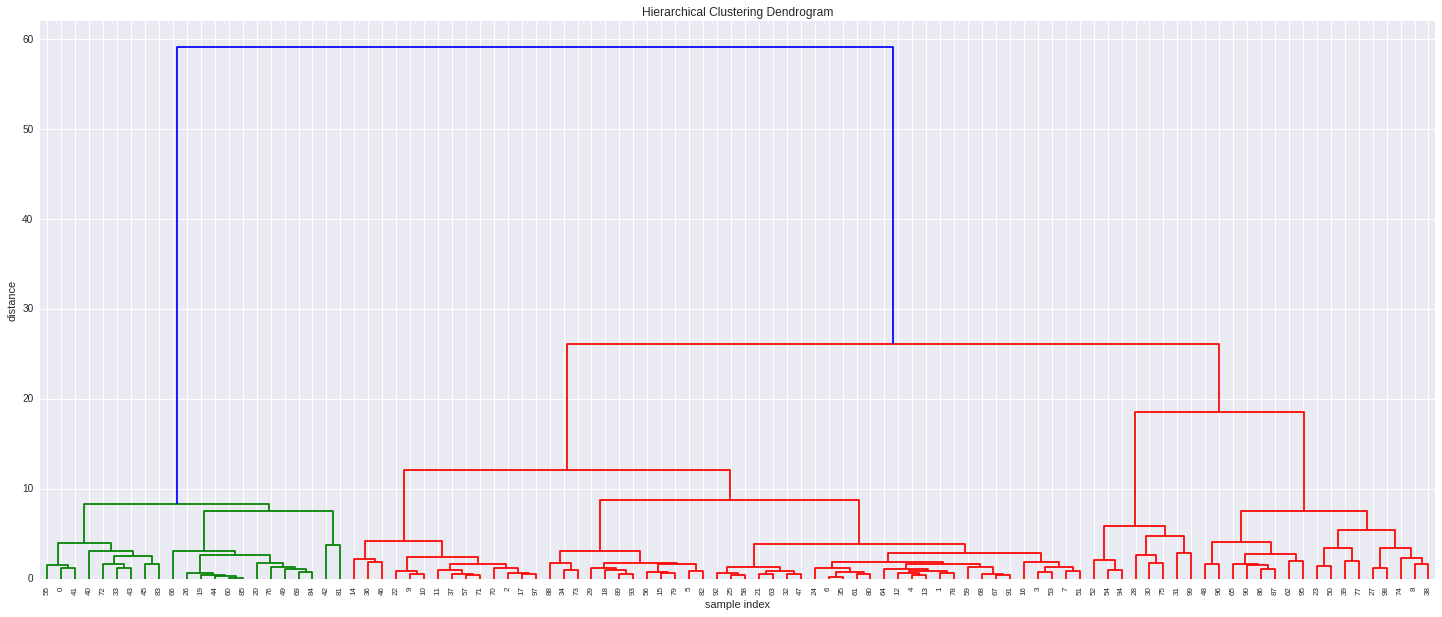

In [36]:
# Just one line :)
%matplotlib inline
Z = hac.linkage(np.asarray(matrix),'ward')

# Plot the dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [37]:
from scipy.cluster.hierarchy import fcluster

In [38]:
Z_best = hac.linkage(matrix,'ward')
clusters=fcluster(Z_best,12, criterion='maxclust')
clusters

array([ 1,  6,  4,  6,  6,  5,  6,  6, 12,  4,  4,  4,  6,  6,  4,  5,  6,
        4,  5,  2,  2,  6,  4, 11,  6,  6,  2, 12,  8,  5,  8,  9,  6,  1,
        5,  6,  4,  4, 12, 11,  1,  1,  3,  1,  2,  1,  4,  6, 10,  2, 11,
        6,  7,  6,  7,  1,  5,  4,  6,  6,  2,  6, 10,  6,  6, 10,  2,  6,
        6,  2,  4,  4,  1,  5, 12,  8,  2, 11,  6,  5,  6,  3,  5,  1,  2,
        2, 10, 10,  5,  5, 10,  6,  6,  5,  7, 10, 10,  4, 12,  9], dtype=int32)

In [39]:
from sklearn.metrics import adjusted_rand_score

In [40]:
for i in range(5,20):
    print(i)
    print(adjusted_rand_score(clusters,fcluster( hac.linkage(np.asarray(matrix),'ward'),i, criterion='maxclust')))

5
0.6296443510242064
6
0.8085809857112474
7
0.8902669358390405
8
0.906922713653432
9
0.9646850996699766
10
0.9773898982914353
11
0.9947145369453868
12
1.0
13
0.9701748101211741
14
0.9590015935542222
15
0.9419000446019861
16
0.7931025536809153
17
0.7919270669134365
18
0.7848368672247867
19
0.7800742677550634


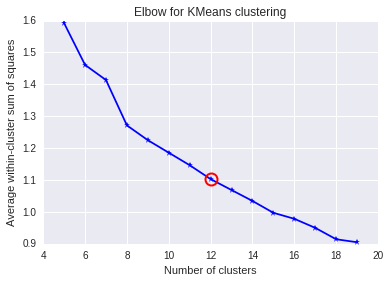

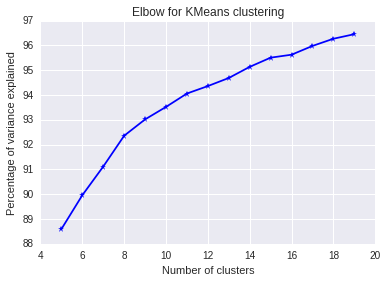

In [41]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

K = range(5,20)
KM = [KMeans(n_clusters=k).fit(matrix) for k in K]
centroids = [k.cluster_centers_ for k in KM]

D_k = [cdist(matrix, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/matrix.shape[0] for d in dist]

# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(matrix)**2)/matrix.shape[0]
bss = tss-wcss

kIdx = 7

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')

In [42]:
file = open("asset_cluster.txt", "a")
file.write("Asset,Cluster\n")

14

In [43]:
for i in range(0,len(data)):
    file.write(str(list(data.index)[i]))
    file.write(",")
    file.write(str(clusters[i]))
    file.write("\n")
    
file.close()

In [105]:
data.index

Index(['X1', 'X10', 'X100', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17',
       'X18', 'X19', 'X2', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26',
       'X27', 'X28', 'X29', 'X3', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35',
       'X36', 'X37', 'X38', 'X39', 'X4', 'X40', 'X41', 'X42', 'X43', 'X44',
       'X45', 'X46', 'X47', 'X48', 'X49', 'X5', 'X50', 'X51', 'X52', 'X53',
       'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X6', 'X60', 'X61', 'X62',
       'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X7', 'X70', 'X71',
       'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X8', 'X80',
       'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X9',
       'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99'],
      dtype='object')

In [106]:
new=pd.read_csv("asset_cluster.txt")
old=pd.read_csv("asset_cluster_best.txt")

In [107]:
adjusted_rand_score(new.Cluster.values,old.Cluster.values)

0.00183557069149326

In [ ]:
0.03242285947823719